# Determines

Using the [Online Retail dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail) from the UCI Machine Learning Repository for exploratory data analysis, ***Customer Segmentation***, ***RFM Analysis***, ***K-Means Clustering*** and ***Cohort Analysis***.

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Feature Information:

**InvoiceNo**: Invoice number. *Nominal*, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
<br>
**StockCode**: Product (item) code. *Nominal*, a 5-digit integral number uniquely assigned to each distinct product.
<br>
**Description**: Product (item) name. *Nominal*. 
<br>
**Quantity**: The quantities of each product (item) per transaction. *Numeric*.
<br>
**InvoiceDate**: Invoice Date and time. *Numeric*, the day and time when each transaction was generated.
<br>
**UnitPrice**: Unit price. *Numeric*, Product price per unit in sterling.
<br>
**CustomerID**: Customer number. *Nominal*, a 5-digit integral number uniquely assigned to each customer.
<br>
**Country**: Country name. *Nominal*, the name of the country where each customer resides.
---

# Tasks

#### <a href="#1.-Data-Cleaning-&-Exploratory-Data-Analysis">1.Data Cleaning and Exploratory Data Analysis</a>

- Import Modules, Load Data & Data Review
- Follow the Steps Below

    *i. Take a look at relationships between InvoiceNo, Quantity and UnitPrice columns.*
    
    *ii. What does the letter "C" in the invoiceno column mean?*
    
    *iii. Handling Missing Values*
    
    *iv. Clean the Data from the Noise and Missing Values*
    
    *v. Explore the Orders*
    
    *vi. Explore Customers by Country*
    
    *vii. Explore the UK Market*
    
#### <a href="#2.-RFM-Analysis">2.RFM Analysis</a>

- Follow the steps below

   *i. Import Libraries*
   
   *ii. Review "df_uk" DataFrame (the df_uk what you create at the end of the Task 1)*
   
   *iii. Calculate Recency*
   
   *iv. Calculate Frequency*
   
   *v. Calculate Monetary Values*
   
   *vi. Create RFM Table*

#### <a href= "#3.-Customer-Segmentation-with-RFM-Scores">3.Customer Segmentation with RFM Scores </a>
- Calculate RFM Scoring

    *i. Creating the RFM Segmentation Table*
 
- Plot RFM Segments

#### <a href= "#4.-Applying-K-Means-Clustering">4.Applying K-Means Clustering</a>
- Data Pre-Processing and Exploring

    *i. Define and Plot Feature Correlations*
 
    *ii. Visualize Feature Distributions*
 
    *iii. Data Normalization*

- K-Means Implementation

    *i. Define Optimal Cluster Number (K) by using "Elbow Method" and "Silhouette Analysis"*
 
    *ii. Visualize the Clusters*
 
    *iii. Assign the label*
 
    *iv. Conclusion*
 
#### <a href = "#5.-Create-Cohort-&-Conduct-Cohort-Analysis">5.Create Cohort and Conduct Cohort Analysis</a>
- Future Engineering

    *i. Extract the Month of the Purchase*
 
    *ii. Calculating time offset in Months i.e. Cohort Index*
 
- Create 1st Cohort: User Number & Retention Rate 

    *i. Pivot Cohort and Cohort Retention*
 
    *ii. Visualize analysis of cohort 1 using seaborn and matplotlib*

- Create 2nd Cohort: Average Quantity Sold 

    *i. Pivot Cohort and Cohort Retention*
 
    *ii. Visualize analysis of cohort 2 using seaborn and matplotlib*

- Create 3rd Cohort: Average Sales

    *i. Pivot Cohort and Cohort Retention*
 
    *ii. Visualize analysis of cohort 3 using seaborn and matplotlib*
    
- **Note: There may be sub-tasks associated with each task, you will see them in order during the course of the work.**


<a href = "#Tasks">Back to top</a>

# 1. Data Cleaning & Exploratory Data Analysis

## Import Modules, Load Data & Data Review

In [ ]:
# !jupyter nbextension enable --py widgetsnbextension

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
def explain(attribute):
    features= {'InvoiceNo': "Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.",
    'StockCode': 'Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.',
    'Description': 'Product (item) name. Nominal.',
    'Quantity': 'The quantities of each product (item) per transaction. Numeric.',
    'InvoiceDate': 'Invice Date and time. Numeric, the day and time when each transaction was generated.',
    'UnitPrice': 'Unit price. Numeric, Product price per unit in sterling.',
    'CustomerID': 'Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.',
    'Country': 'Country name. Nominal, the name of the country where each customer resides.'}
    return features[attribute]

In [4]:
df=pd.read_csv('Online Retail.csv',index_col=0)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.shape

(541909, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


<AxesSubplot:>

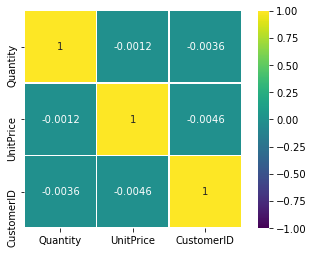

In [9]:
sns.heatmap(df.corr(),square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')

In [10]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [11]:
#profile 

#takes longer time to load turn this on when you need.

In [12]:
df['Quantity'].value_counts()

 1       148227
 2        81829
 12       61063
 6        40868
 4        38484
          ...  
 1287         1
-5368         1
 267          1
-244          1
 512          1
Name: Quantity, Length: 722, dtype: int64

### i. Take a look at relationships between InvoiceNo, Quantity and UnitPrice columns.

In [13]:
# df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo']) # Do I need to convert the type?
df[['InvoiceNo', 'Quantity', 'UnitPrice']].sample(100)

,InvoiceNo,Quantity,UnitPrice
427786,573399,12,1.45
394521,570872,1,7.46
330312,565917,1,2.46
129477,547385,1,0.83
539806,581439,1,5.79
...,...,...,...
374564,569383,4,8.50
154644,549933,25,0.42
208411,555112,12,1.25
295106,562772,4,0.39


In [14]:
df[['InvoiceNo', 'Quantity', 'UnitPrice']].sort_values('Quantity')

,InvoiceNo,Quantity,UnitPrice
540422,C581484,-80995,2.08
61624,C541433,-74215,1.04
225529,556690,-9600,0.00
225530,556691,-9600,0.00
4287,C536757,-9360,0.03
...,...,...,...
421632,573008,4800,0.21
74614,542504,5568,0.00
502122,578841,12540,0.00
61619,541431,74215,1.04


In [15]:
df[['InvoiceNo', 'Quantity', 'UnitPrice']].sort_values('UnitPrice')

,InvoiceNo,Quantity,UnitPrice
299984,A563187,1,-11062.06
299983,A563186,1,-11062.06
40984,539750,1,0.00
52217,540696,1,0.00
52262,540699,1000,0.00
...,...,...,...
16356,C537651,-1,13541.33
43703,C540118,-1,16453.71
43702,C540117,-1,16888.02
524602,C580605,-1,17836.46


In [16]:
df[df['UnitPrice'] < 0][['InvoiceNo', 'Quantity', 'UnitPrice']]

,InvoiceNo,Quantity,UnitPrice
299983,A563186,1,-11062.06
299984,A563187,1,-11062.06


In [17]:
df[df['Quantity'] < 0][['InvoiceNo', 'Quantity', 'UnitPrice']]

,InvoiceNo,Quantity,UnitPrice
141,C536379,-1,27.50
154,C536383,-1,4.65
235,C536391,-12,1.65
236,C536391,-24,0.29
237,C536391,-24,0.29
...,...,...,...
540449,C581490,-11,0.83
541541,C581499,-1,224.69
541715,C581568,-5,10.95
541716,C581569,-1,1.25


We see that there are negative values in the Quantity and UnitPrice columns. These are possibly canceled and returned orders. Let's check it out.

### ii. What does the letter "C" in the InvoiceNo column mean?

In [18]:
df[df['InvoiceNo'].str.contains("C") == True][['InvoiceNo', 'Quantity', 'UnitPrice']]

,InvoiceNo,Quantity,UnitPrice
141,C536379,-1,27.50
154,C536383,-1,4.65
235,C536391,-12,1.65
236,C536391,-24,0.29
237,C536391,-24,0.29
...,...,...,...
540449,C581490,-11,0.83
541541,C581499,-1,224.69
541715,C581568,-5,10.95
541716,C581569,-1,1.25


If the invoice number starts with the letter "C", it means the order was cancelled. Or those who abandon their order.

When we filter canceled orders by Quantity> 0 or filter non-canceled orders by Quantity <0 nothing returns, this confirms that negative values mean the order was canceled. So lets find out how many orders were cancelled?

In [19]:
df[(df['InvoiceNo'].str.contains("C") == True) & (df['Quantity'] > 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [20]:
df[(df['InvoiceNo'].str.contains("C") == False) & (df['Quantity'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [21]:
df[df['InvoiceNo'].str.contains("C") == True]['InvoiceNo'].count()

9288

In [22]:
df[df['InvoiceNo'].str.contains("C") == True]['CustomerID'].nunique() / df['CustomerID'].nunique() * 100

36.34492223238792

9288 or about 36% of the orders were cancelled. Looking deeper into why these orders were cancelled may prevent future cancellations. So it would be better to keep them in a spare dataframe to evaluate.

In [23]:
canceled_orders = df[df['InvoiceNo'].str.contains("C") == True]

In [24]:
canceled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [25]:
df['canceled'] = df['InvoiceNo'].str.contains("C")


In [26]:
df['canceled'] = df.canceled*1

In [27]:
df.canceled.value_counts()

0    532621
1      9288
Name: canceled, dtype: int64

In [28]:
df.drop(canceled_orders.index, axis=0, inplace=True)

In [29]:
df.shape

(532621, 9)

In [30]:
df.drop('canceled', axis=1, inplace=True)

#### Now let's find out what a negative UnitPrice means.


In [31]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [32]:
df.drop([299983, 299984], axis=0, inplace=True)

In [33]:
df.shape

(532619, 8)

There are two entries with negative unit price and InvoiceNO for both begin with "A". It looks this is a debt and not necessary here.

### iii. Handling Missing Values

Since the customer ID's are missing, lets assume these orders were not made by the customers already in the data set because those customers already have ID's. 

We also don't want to assign these orders to those customers because this would alter the insights we draw from the data. So it would be better to drop the rows with missing customer id.


In [34]:
df['CustomerID'].isnull().sum()

134695

In [35]:
df.dropna(subset=['CustomerID'], inplace=True)

In [36]:
df.shape

(397924, 8)

### v. Explore the Orders


1. Find the unique number of InvoiceNo  per customer

In [37]:
df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values()

CustomerID
12346.0      1
15127.0      1
16302.0      1
17253.0      1
13845.0      1
          ... 
14606.0     93
13089.0     97
17841.0    124
14911.0    201
12748.0    210
Name: InvoiceNo, Length: 4339, dtype: int64

2. What's the average number of unqiue items per order or per customer?

In [38]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [39]:
explain('StockCode')

'Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.'

In [40]:
df.groupby(['CustomerID', 'InvoiceNo', 'StockCode'])['Quantity'].mean()

CustomerID  InvoiceNo  StockCode
12346.0     541431     23166        74215.0
12347.0     537626     20780           12.0
                       20782            6.0
                       21064            6.0
                       21171           12.0
                                     ...   
18287.0     570715     85039B          48.0
                       85173           48.0
            573167     21014           24.0
                       21824           48.0
                       23264           36.0
Name: Quantity, Length: 387875, dtype: float64

3. Let's see how this compares to the number of unique products per customer.

In [41]:
df.groupby(['CustomerID', 'StockCode'])['Quantity'].sum()

CustomerID  StockCode
12346.0     23166        74215
12347.0     16008           24
            17021           36
            20665            6
            20719           40
                         ...  
18287.0     84920            4
            85039A          96
            85039B         120
            85040A          48
            85173           48
Name: Quantity, Length: 266802, dtype: int64

### vi. Explore Customers by Country

1. What's the total revenue per country?

In [42]:
df['PaymentDue'] = df['Quantity'] * df['UnitPrice']

In [43]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PaymentDue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [44]:
df.groupby('Country')['PaymentDue'].sum().round().sort_values(ascending=False)

Country
United Kingdom          7308392.0
Netherlands              285446.0
EIRE                     265546.0
Germany                  228867.0
France                   209024.0
Australia                138521.0
Spain                     61577.0
Switzerland               56444.0
Belgium                   41196.0
Sweden                    38378.0
Japan                     37416.0
Norway                    36165.0
Portugal                  33440.0
Finland                   22546.0
Singapore                 21279.0
Channel Islands           20450.0
Denmark                   18955.0
Italy                     17483.0
Cyprus                    13590.0
Austria                   10199.0
Poland                     7335.0
Israel                     7222.0
Greece                     4761.0
Iceland                    4310.0
Canada                     3666.0
USA                        3580.0
Malta                      2726.0
Unspecified                2667.0
United Arab Emirates       1902.0
Lebano

2. Visualize number of customer per country

In [45]:
df.groupby('Country')['CustomerID'].count().sort_values(ascending=False)

Country
United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


In [46]:
df.groupby('Country')['CustomerID'].nunique().count()

37

In [47]:
unique_cust = df[['Country', 'CustomerID']].drop_duplicates()
unique_cust.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
35,United Kingdom,3921
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,14
12,Finland,12
1,Austria,11


<AxesSubplot:xlabel='Country'>

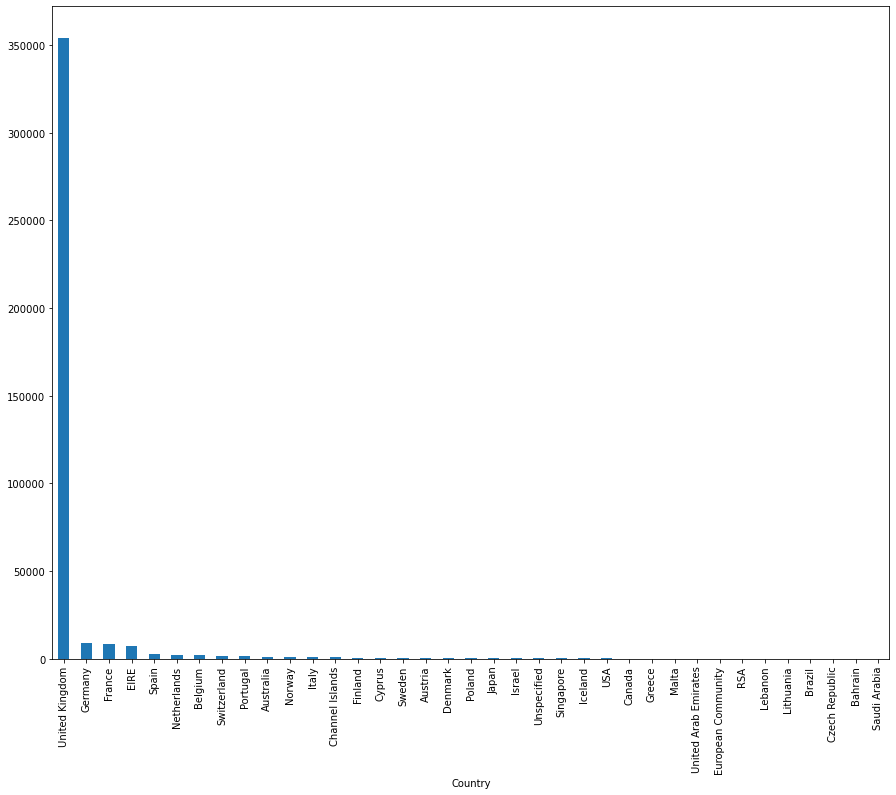

In [48]:
plt.figure(figsize=(15,12))
df.groupby('Country')['CustomerID'].count().sort_values(ascending=False).plot(kind='bar')

3. Visualize total cost per country

<AxesSubplot:xlabel='Country'>

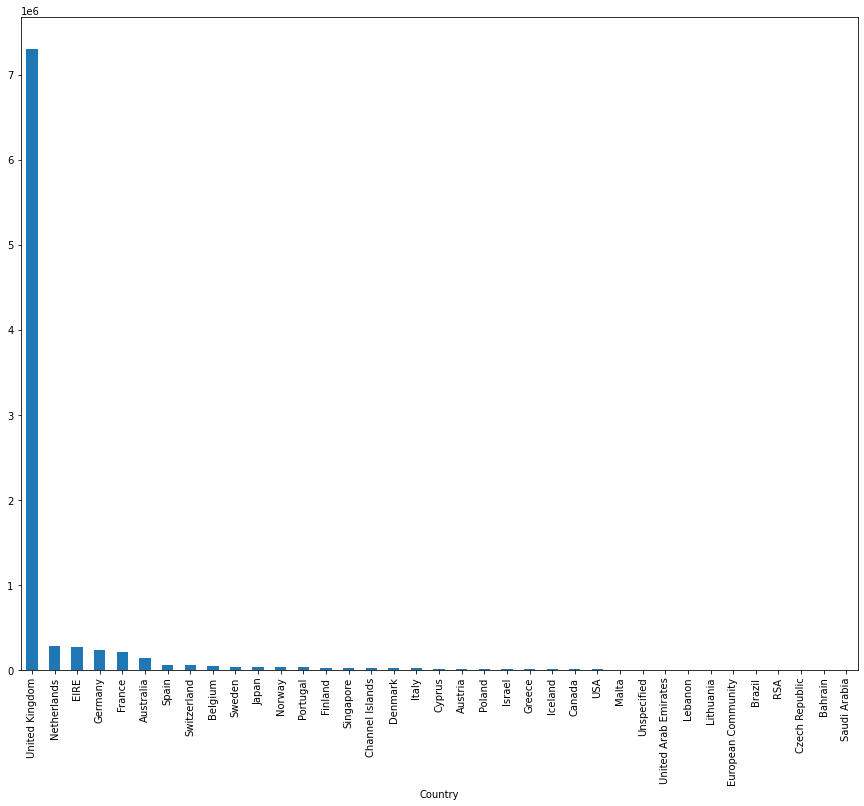

In [49]:
plt.figure(figsize=(15,12))
df.groupby('Country')['PaymentDue'].sum().round().sort_values(ascending=False).plot(kind='bar')

In [50]:
(df.groupby('Country')['PaymentDue'].sum() / df.groupby('Country')['CustomerID'].count()).round().sort_values(ascending=False)

Country
Netherlands             121.0
Japan                   117.0
Australia               117.0
Singapore                96.0
Sweden                   85.0
Denmark                  50.0
Lithuania                47.0
Lebanon                  38.0
EIRE                     37.0
Brazil                   36.0
Norway                   34.0
Finland                  33.0
Greece                   33.0
Czech Republic           33.0
Bahrain                  32.0
Switzerland              31.0
Israel                   29.0
United Arab Emirates     28.0
Channel Islands          27.0
Austria                  26.0
Germany                  25.0
France                   25.0
Spain                    25.0
Iceland                  24.0
Canada                   24.0
Malta                    24.0
Italy                    23.0
Portugal                 23.0
European Community       22.0
Cyprus                   22.0
Poland                   22.0
United Kingdom           21.0
Belgium                  20.0
US

<AxesSubplot:xlabel='Country'>

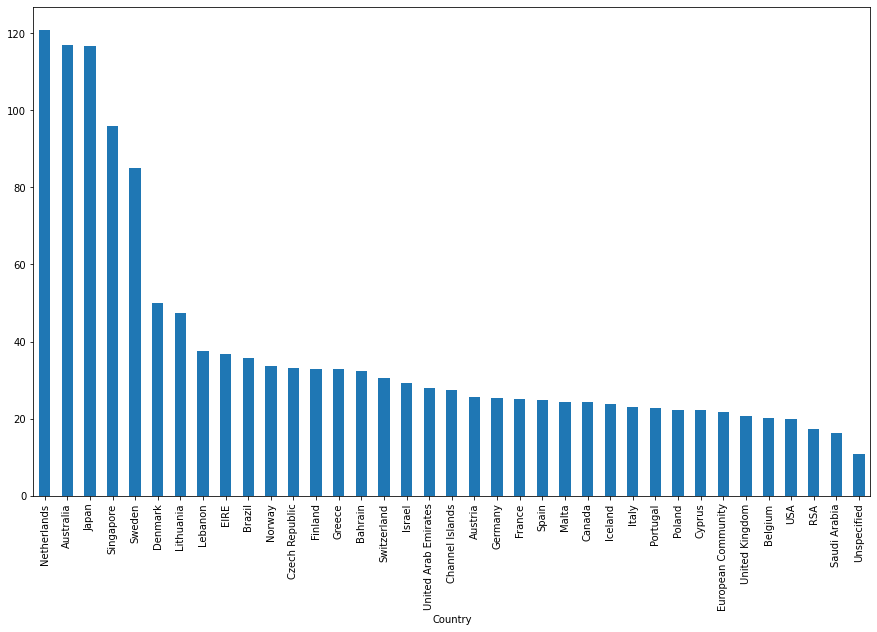

In [51]:
plt.figure(figsize=(15,9))
(df.groupby('Country')['PaymentDue'].sum() / df.groupby('Country')['CustomerID'].count()).sort_values(ascending=False).plot(kind='bar')

In [52]:
df.drop_duplicates(inplace=True)

Althouhg the UK has the most revenue and customer amoung the countries, the ratio of revenue over custormer number provides another insight and change the order of the list.

**The UK not only has the most sales revenue, but also the most customers. Since the majority of this data set contains orders from the UK, we can explore the UK market further by finding out what products the customers buy together and any other buying behaviors to improve our sales and targeting strategy.**

In [53]:
df[(df['Country'] == 'United Kingdom')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PaymentDue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


In [54]:
df[(df['Country'] == 'United Kingdom')].groupby('InvoiceNo')['Quantity'].count().sort_values(ascending=False)

InvoiceNo
576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
562255      1
540842      1
562208      1
562103      1
559677      1
Name: Quantity, Length: 16649, dtype: int64

In [55]:
df[(df['Country'] == 'United Kingdom')].groupby('InvoiceNo')['PaymentDue', 'Quantity'].sum().sort_values(by='Quantity',ascending=False)

,PaymentDue,Quantity
InvoiceNo,,
581483,168469.60,80995
541431,77183.60,74215
567423,31698.16,12572
578841,0.00,12540
562439,18841.48,11848
...,...,...
581127,15.00,1
558721,8.25,1
559343,4.25,1


In [56]:
df[(df['Country'] == 'United Kingdom')].groupby('InvoiceNo')['PaymentDue', 'Quantity'].sum().sort_values(by='PaymentDue',ascending=False)

,PaymentDue,Quantity
InvoiceNo,,
581483,168469.60,80995
541431,77183.60,74215
556444,38970.00,60
567423,31698.16,12572
572209,22206.00,1920
...,...,...
567869,0.40,5
570554,0.38,1
578841,0.00,12540


In [57]:
df[(df['InvoiceNo'] == 578841)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PaymentDue


In [58]:
df[df['UnitPrice'] == 0].shape

(40, 9)

In [59]:
df.drop(index=df[df['UnitPrice'] == 0].index, inplace=True)

In [60]:
df[(df['Country'] == 'United Kingdom')].groupby('StockCode')['Quantity'].count().sort_values(ascending=False)

StockCode
85123A    1936
85099B    1461
22423     1417
84879     1320
47566     1300
          ... 
37491B       1
90028        1
90027D       1
84877A       1
90078        1
Name: Quantity, Length: 3645, dtype: int64

### vii. Explore the UK Market


1. Create df_uk DataFrame

In [61]:
df_uk = df[(df['Country'] == 'United Kingdom')]

In [62]:
df_uk.shape

(349203, 9)

2. What are the most popular products that are bought in the UK?

In [63]:
df_uk.groupby('StockCode')['Quantity'].count().sort_values(ascending=False)

StockCode
85123A    1936
85099B    1461
22423     1417
84879     1320
47566     1300
          ... 
37491B       1
90028        1
90027D       1
84877A       1
90078        1
Name: Quantity, Length: 3645, dtype: int64

We will continue analyzing the UK transactions with customer segmentation.

<a href = "#Tasks">Back to top</a>

# 2. RFM Analysis

In the age of the internet and e-commerce, companies that do not expand their businesses online or utilize digital tools to reach their customers will run into issues like scalability and a lack of digital precsence. An important marketing strategy e-commerce businesses use for analyzing and predicting customer value is customer segmentation. Customer data is used to sort customers into group based on their behaviors and preferences.

**[RFM](https://www.putler.com/rfm-analysis/) (Recency, Frequency, Monetary) Analysis** is a customer segmentation technique for analyzing customer value based on past buying behavior. RFM analysis was first used by the direct mail industry more than four decades ago, yet it is still an effective way to optimize your marketing.
<br>
<br>
Our goal in this Notebook is to cluster the customers in our data set to:
 - Recognize who are our most valuable customers
 - Increase revenue
 - Increase customer retention
 - Learn more about the trends and behaviors of our customers
 - Define customers that are at risk

We will start with **RFM Analysis** and then compliment our findings with predictive analysis using **K-Means Clustering Algorithms.**

- RECENCY (R): Time since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total monetary value




Benefits of RFM Analysis

- Increased customer retention
- Increased response rate
- Increased conversion rate
- Increased revenue

RFM Analysis answers the following questions:
 - Who are our best customers?
 - Who has the potential to be converted into more profitable customers?
 - Which customers do we need to retain?
 - Which group of customers is most likely to respond to our marketing campaign?
 

### ii. Review df_uk DataFrame

In [64]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PaymentDue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [65]:
df_uk.duplicated().any()

False

In [66]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349203 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    349203 non-null  object 
 1   StockCode    349203 non-null  object 
 2   Description  349203 non-null  object 
 3   Quantity     349203 non-null  int64  
 4   InvoiceDate  349203 non-null  object 
 5   UnitPrice    349203 non-null  float64
 6   CustomerID   349203 non-null  float64
 7   Country      349203 non-null  object 
 8   PaymentDue   349203 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 26.6+ MB


In [67]:
df_uk.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,349203.0,12.145672,190.628818,1.000,2.00,4.00,12.00,80995.00
UnitPrice,349203.0,2.972328,17.990908,0.001,1.25,1.95,3.75,8142.75
CustomerID,349203.0,15548.384252,1594.384044,12346.000,14191.00,15518.00,16931.00,18287.00
PaymentDue,349203.0,20.861862,328.417275,0.001,4.20,10.20,17.85,168469.60


In [68]:
df_uk.isnull().any()

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
PaymentDue     False
dtype: bool

In [69]:
df_uk['InvoiceDate'].sort_values(ascending=False)

541893    2011-12-09 12:49:00
541891    2011-12-09 12:49:00
541890    2011-12-09 12:49:00
541892    2011-12-09 12:49:00
541879    2011-12-09 12:31:00
                 ...         
4         2010-12-01 08:26:00
3         2010-12-01 08:26:00
2         2010-12-01 08:26:00
1         2010-12-01 08:26:00
0         2010-12-01 08:26:00
Name: InvoiceDate, Length: 349203, dtype: object

In [70]:
df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'], format='%Y-%m-%d')

In [71]:
df_uk['InvoiceDate'].dtype

dtype('<M8[ns]')

### iii. Recency: Days since last purchase
To calculate the recency values, follow these steps in order:

1. To calculate recency, we need to choose a date as a point of reference to evaluate how many days ago was the customer's last purchase.
2. Create a new column called Date which contains the invoice date without the timestamp
3. Group by CustomerID and check the last date of purchase
4. Calculate the days since last purchase
5. Drop Last_Purchase_Date since we don't need it anymore
6. Plot RFM distributions

1. Choose a date as a point of reference to evaluate how many days ago was the customer's last purchase.

In [72]:
last_day = dt.datetime(2011, 12, 9)

In [73]:
last_day

datetime.datetime(2011, 12, 9, 0, 0)

2. Create a new column called Date which contains the invoice date without the timestamp

In [74]:
df_uk['Date'] = pd.to_datetime(df_uk['InvoiceDate'])
df_uk['Date'] = df_uk['Date'].dt.date

In [75]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PaymentDue,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


3. Group by CustomerID and check the last date of purchase

In [76]:
df_uk['Last_Purchase'] = df_uk.groupby('CustomerID')['Date'].transform('max')

In [77]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PaymentDue,Date,Last_Purchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-02
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-02
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-02
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-02
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-02


4. Calculate the days since last purchase

In [78]:
max_invoice = pd.to_datetime(max(df['InvoiceDate']), format='%Y-%m-%d')
max_invoice

Timestamp('2011-12-09 12:50:00')

In [79]:
# df_uk['Recency'] = (last_day - df_uk.groupby('CustomerID')['Last_Purchase'])
df_uk['Recency'] = df_uk.groupby('CustomerID')['Last_Purchase'].apply(lambda x: max_invoice.date() - x)

In [80]:
df_uk['Recency'] = df_uk['Recency'].dt.days

In [81]:
df_uk.sort_values(by='CustomerID')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PaymentDue,Date,Last_Purchase,Recency
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60,2011-01-18,2011-01-18,325
175879,551992,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2011-05-05 15:31:00,1.69,12747.0,United Kingdom,27.04,2011-05-05,2011-12-07,2
106285,545321,85099F,JUMBO BAG STRAWBERRY,20,2011-03-01 14:53:00,1.95,12747.0,United Kingdom,39.00,2011-03-01,2011-12-07,2
203737,554549,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,48,2011-05-25 09:57:00,1.45,12747.0,United Kingdom,69.60,2011-05-25,2011-12-07,2
203738,554549,82486,WOOD S/3 CABINET ANT WHITE FINISH,2,2011-05-25 09:57:00,8.95,12747.0,United Kingdom,17.90,2011-05-25,2011-12-07,2
...,...,...,...,...,...,...,...,...,...,...,...,...
392724,570715,22306,SILVER MUG BONE CHINA TREE OF LIFE,24,2011-10-12 10:23:00,1.06,18287.0,United Kingdom,25.44,2011-10-12,2011-10-28,42
392723,570715,23267,SET OF 4 SANTA PLACE SETTINGS,24,2011-10-12 10:23:00,1.25,18287.0,United Kingdom,30.00,2011-10-12,2011-10-28,42
392722,570715,22144,CHRISTMAS CRAFT LITTLE FRIENDS,6,2011-10-12 10:23:00,2.10,18287.0,United Kingdom,12.60,2011-10-12,2011-10-28,42
392720,570715,22603,CHRISTMAS RETROSPOT TREE WOOD,24,2011-10-12 10:23:00,0.85,18287.0,United Kingdom,20.40,2011-10-12,2011-10-28,42


5. Drop Last_Purchase_Date since we don't need it anymore

In [82]:
df_uk.drop('Last_Purchase', axis=1, inplace=True)

In [83]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PaymentDue,Date,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,372
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,372
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,372
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,372
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,372


6. Plot RFM distributions

<AxesSubplot:ylabel='Frequency'>

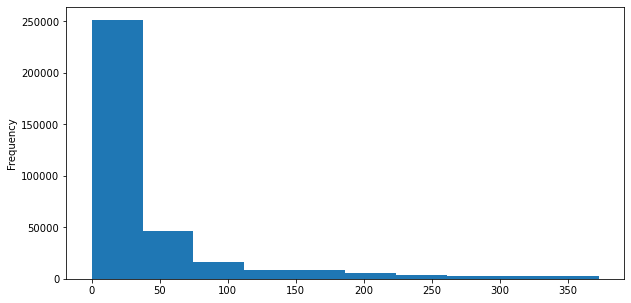

In [84]:
plt.figure(figsize=(10, 5))
df_uk['Recency'].plot.hist(bins=10)

### iv. Frequency: Number of purchases

To calculate how many times a customer purchased something, we need to count how many invoices each customer has. To calculate the frequency values, follow these steps in order:

1. Make a copy of df_uk and drop duplicates

In [85]:
df_uk = df_uk.drop_duplicates()

In [86]:
df_uk.shape

(349203, 11)

2. Calculate the frequency of purchases

In [87]:
df_uk['Frequency'] =df_uk.groupby('CustomerID')['InvoiceNo'].transform('nunique')

In [88]:
df_uk.sample(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PaymentDue,Date,Recency,Frequency
525356,580615,23309,SET OF 60 I LOVE LONDON CAKE CASES,48,2011-12-05 12:05:00,0.55,16873.0,United Kingdom,26.40,2011-12-05,4,6
63503,541574,21935,SUKI SHOULDER BAG,10,2011-01-19 12:52:00,1.65,12826.0,United Kingdom,16.50,2011-01-19,2,7
83597,543342,21068,VINTAGE BILLBOARD LOVE/HATE MUG,12,2011-02-07 12:27:00,1.25,17162.0,United Kingdom,15.00,2011-02-07,28,10
261492,559865,21498,RED RETROSPOT WRAP,25,2011-07-13 10:39:00,0.42,14409.0,United Kingdom,10.50,2011-07-13,71,6
17755,537773,21929,JUMBO BAG PINK VINTAGE PAISLEY,3,2010-12-08 12:36:00,1.95,16016.0,United Kingdom,5.85,2010-12-08,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...
98232,544673,20756,GREEN FERN POCKET BOOK,6,2011-02-22 15:46:00,0.85,13421.0,United Kingdom,5.10,2011-02-22,40,2
95279,544450,22668,PINK BABY BUNTING,5,2011-02-20 12:23:00,2.95,17811.0,United Kingdom,14.75,2011-02-20,4,39
525413,580619,20982,12 PENCILS TALL TUBE SKULLS,24,2011-12-05 12:08:00,0.85,15053.0,United Kingdom,20.40,2011-12-05,4,3
367600,568898,22814,CARD PARTY GAMES,12,2011-09-29 13:17:00,0.42,13354.0,United Kingdom,5.04,2011-09-29,71,1


3. Plot RFM distributions

<AxesSubplot:ylabel='Frequency'>

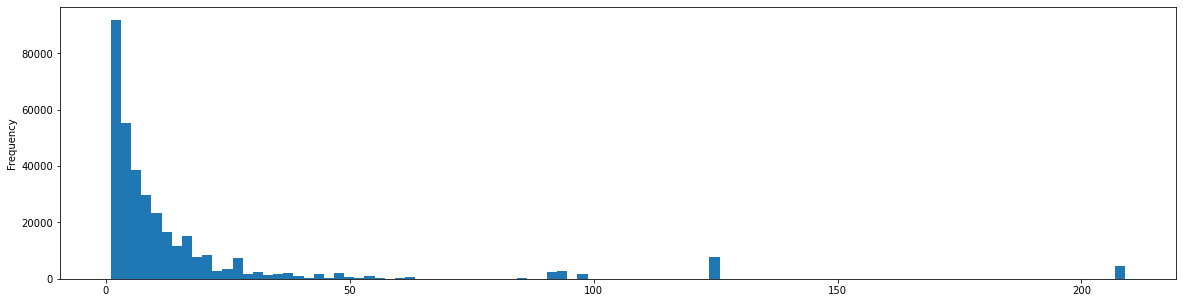

In [89]:
plt.figure(figsize=(20, 5))
df_uk['Frequency'].plot.hist(bins=100)

### v. Monetary: Total amount of money spent

The monetary value is calculated by adding together the cost of the customers' purchases.


1. Calculate sum total cost by customers and named "Monetary"

In [90]:
df_uk['Monetary'] = df_uk.groupby('CustomerID')['PaymentDue'].transform('sum')

In [91]:
df_uk.sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PaymentDue,Date,Recency,Frequency,Monetary
489277,578006,21810,CHRISTMAS HANGING STAR WITH BELL,48,2011-11-22 12:40:00,0.39,13363.0,United Kingdom,18.72,2011-11-22,17,2,992.50
478776,577106,23300,GARDENERS KNEELING PAD CUP OF TEA,2,2011-11-17 17:18:00,1.65,14456.0,United Kingdom,3.30,2011-11-17,5,9,3017.28
371620,569222,22979,PANTRY WASHING UP BRUSH,3,2011-10-02 13:46:00,1.45,15906.0,United Kingdom,4.35,2011-10-02,19,7,1567.69
179575,552281,47566B,TEA TIME PARTY BUNTING,12,2011-05-08 12:42:00,4.95,15704.0,United Kingdom,59.40,2011-05-08,140,4,2293.62
321851,565207,20728,LUNCH BAG CARS BLUE,1,2011-09-01 16:46:00,1.65,16764.0,United Kingdom,1.65,2011-09-01,3,13,2790.95
268436,560422,22386,JUMBO BAG PINK POLKADOT,10,2011-07-18 15:14:00,2.08,16746.0,United Kingdom,20.80,2011-07-18,4,18,6680.11
237452,557858,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,2,2011-06-23 11:51:00,4.95,14159.0,United Kingdom,9.90,2011-06-23,19,11,4630.35
385855,570218,22666,RECIPE BOX PANTRY YELLOW DESIGN,6,2011-10-09 12:20:00,2.95,16873.0,United Kingdom,17.70,2011-10-09,4,6,7123.62
399281,571275,21534,DAIRY MAID LARGE MILK JUG,1,2011-10-16 12:28:00,4.95,15994.0,United Kingdom,4.95,2011-10-16,54,1,414.27
487539,577771,23199,JUMBO BAG APPLES,10,2011-11-21 15:42:00,2.08,16168.0,United Kingdom,20.80,2011-11-21,10,27,3787.60


2. Plot RFM distributions

<AxesSubplot:ylabel='Frequency'>

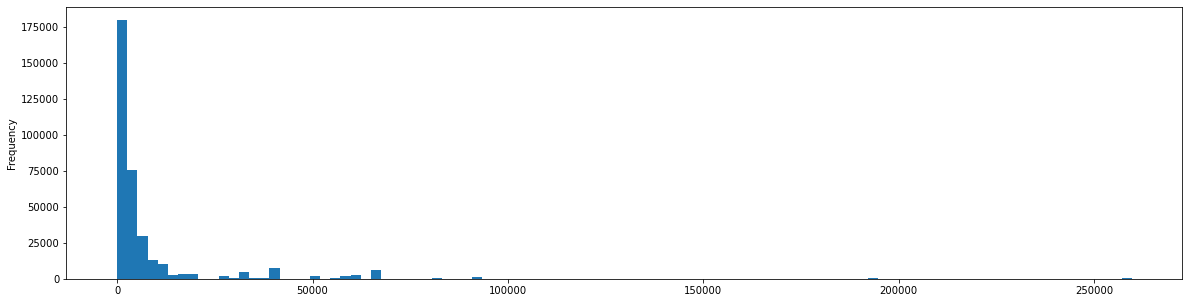

In [92]:
plt.figure(figsize=(20, 5))
df_uk['Monetary'].plot.hist(bins=100)

In [93]:
df_uk[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,349203.000000,349203.000000,349203.000000
mean,40.854595,16.448375,7780.134140
std,65.604550,31.300674,17515.515561
min,0.000000,1.000000,3.750000
25%,4.000000,3.000000,1048.280000
50%,16.000000,7.000000,2515.840000
75%,44.000000,15.000000,5625.080000
max,373.000000,209.000000,259657.300000


### vi. Create RFM Table
Merge the recency, frequency and motetary dataframes

In [94]:
RFM_table = df_uk[['CustomerID','Recency', 'Frequency', 'Monetary']]

In [95]:
RFM_table['CustomerID'].value_counts()

17841.0    7676
14096.0    5111
12748.0    4412
14606.0    2677
15311.0    2366
           ... 
13703.0       1
15070.0       1
16144.0       1
18268.0       1
17846.0       1
Name: CustomerID, Length: 3920, dtype: int64

In [96]:
RFM_table.duplicated().sum()

345283

In [97]:
RFM_table.drop_duplicates(inplace=True)

In [98]:
RFM_table['CustomerID'].value_counts()

18082.0    1
17158.0    1
13774.0    1
13769.0    1
16266.0    1
          ..
14423.0    1
15777.0    1
13523.0    1
17926.0    1
17920.0    1
Name: CustomerID, Length: 3920, dtype: int64

In [99]:
RFM_table.sort_values(by='CustomerID')

,CustomerID,Recency,Frequency,Monetary
61619,12346.0,325,1,77183.60
9754,12747.0,2,11,4196.01
1016,12748.0,0,209,33053.19
184487,12749.0,3,5,4090.88
59368,12820.0,3,4,942.34
...,...,...,...,...
111045,18280.0,277,1,180.60
222954,18281.0,180,1,80.82
291854,18282.0,7,2,178.05
46026,18283.0,3,16,2045.53


In [100]:
RFM_table.drop_duplicates(inplace=True)

In [101]:
RFM_table.set_index('CustomerID', inplace=True)

<a href = "#Tasks">Back to top</a>

# 3. Customer Segmentation with RFM Scores

Businesses have this ever-lasting urge to understand their customers. The better you understand the customer, the better you serve them, and the higher the financial gain you receive from that customer. Since the dawn of trade, this process of understanding customers for a strategic gain has been there practiced and this task is known majorly as [Customer Segmentation](https://clevertap.com/blog/rfm-analysis/).
Well as the name suggests, Customer Segmentation could segment customers according to their precise needs. Some of the common ways of segmenting customers are based on their Recency-Frequency-Monatory values, their demographics like gender, region, country, etc, and some of their business-crafted scores. You will use Recency-Frequency-Monatory values for this case.

In this section, you will create an RFM Segmentation Table where you segment your customers by using the RFM table. For example, you can label the best customer as "Big Spenders" and the lost customer as "Lost Customer".

## Calculate RFM Scoring

The simplest way to create customer segments from an RFM model is by using **Quartiles**. We will assign a score from 1 to 4 to each category (Recency, Frequency, and Monetary) with 4 being the highest/best value. The final RFM score is calculated by combining all RFM values. For Customer Segmentation, you will use the df_rfm data set resulting from the RFM analysis.
<br>
<br>
**Note**: Data can be assigned into more groups for better granularity, but we will use 4 in this case.

1. Divide the df_rfm into quarters

In [102]:
quantile = RFM_table.quantile([0.25, 0.5, 0.75])

In [103]:
quantile

,Recency,Frequency,Monetary
0.25,17.0,1.0,298.185
0.50,50.0,2.0,644.975
0.75,142.0,5.0,1571.285


### i. Creating the RFM Segmentation Table


1. Create two functions, one for Recency and one for Frequency and Monetary. For Recency, customers in the first quarter should be scored as 4, this represents the highest Recency value. Conversely, for Frequency and Monetary, customers in the last quarter should be scored as 4, representing the highest Frequency and Monetary values.

In [104]:
def RScore(x,p,d):
    
    """Find customers recency score to calculate RFM score
    x: value in the cell of your dateframe
    p: quantile dataframe
    d: column name in the quantile dataframe"""
    
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [105]:
def FMScore(x,p,d):
            
    """Find customers recency score to calculate RFM score
    x: value in the cell of your dateframe
    p: quantile dataframe
    d: column name in the quantile dataframe"""
 
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

2. Score customers from 1 to 4 by applying the functions you have created. Also create separate score column for each value. 

In [106]:
RFM_table['R_Score'] = RFM_table['Recency'].apply(RScore, args=('Recency', quantile ))

RFM_table['F_Score'] = RFM_table['Frequency'].apply(FMScore, args=('Frequency', quantile ))

RFM_table['M_Score'] = RFM_table['Monetary'].apply(FMScore, args=('Monetary', quantile ))

In [107]:
RFM_table.sample(20)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
CustomerID,,,,,,
12929.0,311,1,117.85,1,1,1
16014.0,37,3,646.83,3,3,3
15829.0,99,2,636.14,2,2,2
17694.0,141,1,283.12,2,1,1
14388.0,10,8,3212.84,4,4,4
14576.0,372,1,35.40,1,1,1
14878.0,12,9,1476.09,4,4,3
15967.0,23,2,397.68,3,2,2
17340.0,29,11,12353.29,3,4,4


In [108]:
RFM_table.shape

(3920, 6)

3. Now that scored each customer, you'll combine the scores for segmentation.

In [109]:
RFM_table['RFM_Score'] = RFM_table['R_Score'].map(str) + '-' + RFM_table['F_Score'].map(str) + '-' + RFM_table['M_Score'].map(str)

In [110]:
RFM_table.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
17850.0,372,34,5391.21,1,4,4,1-4-4
13047.0,31,10,3237.54,3,4,4,3-4-4
13748.0,95,5,948.25,2,3,3,2-3-3
15100.0,333,3,876.00,1,3,3,1-3-3
15291.0,25,15,4668.30,3,4,4,3-4-4


In [111]:
RFM_table['RFM_Total'] = RFM_table[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

RFM_table.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Total
CustomerID,,,,,,,,
17850.0,372,34,5391.21,1,4,4,1-4-4,9
13047.0,31,10,3237.54,3,4,4,3-4-4,11
13748.0,95,5,948.25,2,3,3,2-3-3,8
15100.0,333,3,876.00,1,3,3,1-3-3,7
15291.0,25,15,4668.30,3,4,4,3-4-4,11


4. Define rfm_level function that tags customers by using RFM_Scrores and Create a new variable RFM_Level

In [112]:
def rfm_level(df):
    
    '''Assigns rfm level based on R_Score, F_Score, M_Score and RFM_Score
    df: data frame'''
    
    if (df['R_Score'] == 4) and (df['F_Score'] == 4) and (3 <= df['M_Score'] <= 4):
        return 'Best Customer'
    elif (df['F_Score'] == 4) and (3 <= df['R_Score'] <= 4) and (3 <= df['M_Score'] <= 4):
        return 'Loyal Customer'
    elif (df['M_Score'] == 4) and (3 <= df['R_Score'] <= 4) and (3 <= df['F_Score'] <= 4):
        return 'Big Spender'
    elif (df['R_Score'] == 2) and (2 <= df['F_Score'] <= 3) and (2 <= df['M_Score'] <= 3):
        return 'Almost Lost'
    elif (df['R_Score'] == 1) and (2 <= df['F_Score'] <= 3) and (2 <= df['M_Score'] <= 3):
        return 'Lost Customer'
    elif (df['R_Score'] == 1) and (df['F_Score'] == 1) and (df['M_Score'] == 1):
        return 'Lost Cheap Customer'
  
    # if any customer left behind, following block, which uses the similar logic as above, will assign a segment.
    
    elif df['RFM_Total'] >= 11:
        return 'Best Customer'
    elif (9 <= df['RFM_Total'] <= 10):
        return 'Loyal Customer'
    elif (6 <= df['RFM_Total'] <= 8):
        return 'Almost Lost'
    else:
        return 'Lost Customer'


    # Create a new variable RFM_Level
RFM_table['RFM_Level'] = RFM_table.apply(rfm_level, axis=1)
RFM_table.head()
    

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Total,RFM_Level
CustomerID,,,,,,,,,
17850.0,372,34,5391.21,1,4,4,1-4-4,9,Loyal Customer
13047.0,31,10,3237.54,3,4,4,3-4-4,11,Loyal Customer
13748.0,95,5,948.25,2,3,3,2-3-3,8,Almost Lost
15100.0,333,3,876.00,1,3,3,1-3-3,7,Lost Customer
15291.0,25,15,4668.30,3,4,4,3-4-4,11,Loyal Customer


5. Calculate average values for each RFM_Level, and return a size of each segment 

In [113]:
RFM_table.groupby('RFM_Level')['RFM_Total'].mean().sort_values(ascending=True)

RFM_Level
Lost Cheap Customer     3.000000
Lost Customer           4.731141
Almost Lost             7.048467
Loyal Customer          9.711401
Big Spender            10.509202
Best Customer          11.890526
Name: RFM_Total, dtype: float64

## Plot RFM Segments

1. Create your plot and resize it.

In [114]:
RFM_table.groupby('RFM_Level')['RFM_Level'].count().sort_values(ascending=False)

RFM_Level
Lost Customer          1034
Almost Lost            1011
Loyal Customer          842
Best Customer           475
Lost Cheap Customer     395
Big Spender             163
Name: RFM_Level, dtype: int64

<AxesSubplot:xlabel='RFM_Level'>

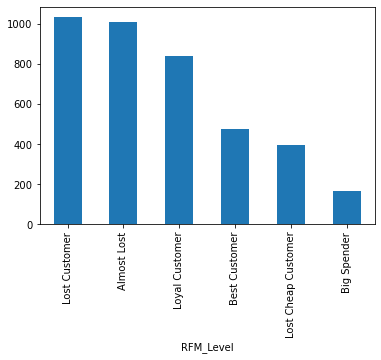

In [115]:
RFM_table.groupby('RFM_Level')['RFM_Level'].count().sort_values(ascending=False).plot(kind='bar')

Text(0.5, 1.0, 'Monetary by Segment')

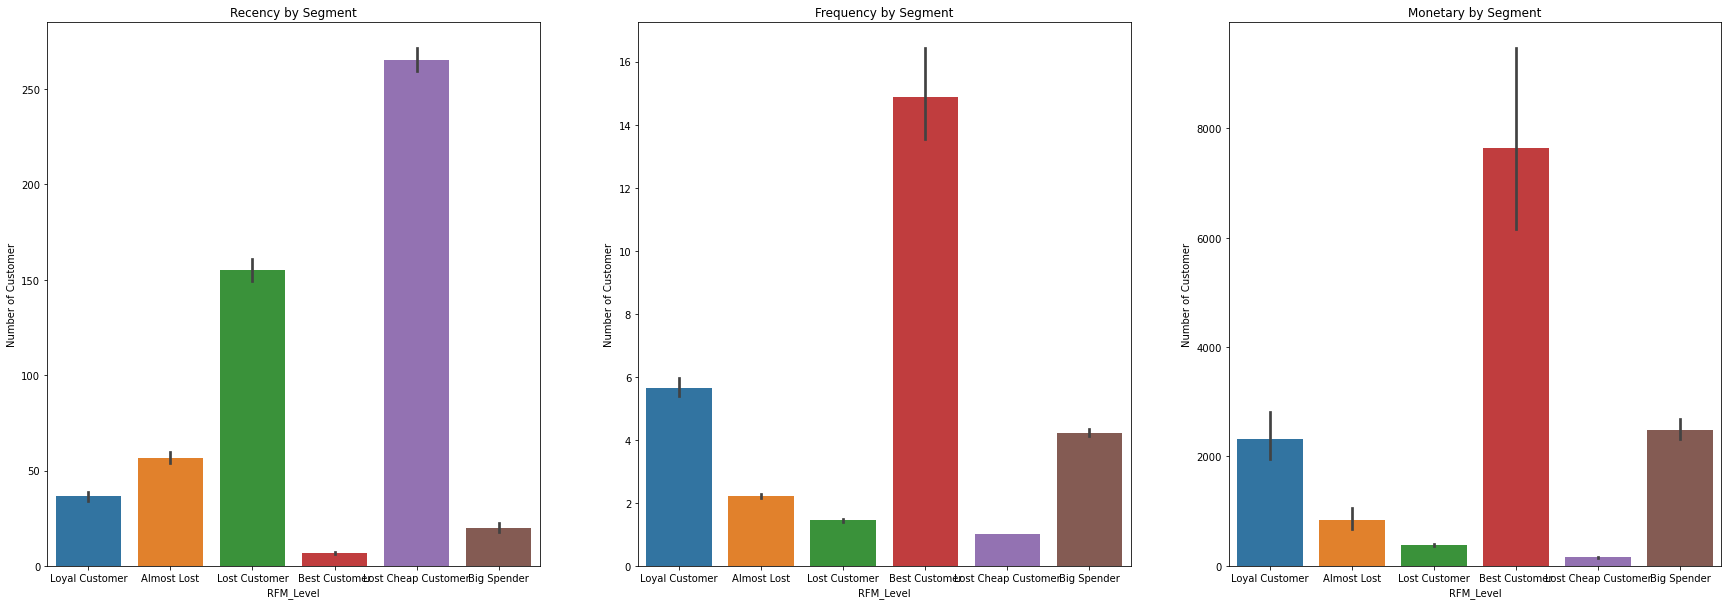

In [116]:
plt.figure(figsize = (30,10))

plt.subplot(1,3,1)
ax = sns.barplot(x="RFM_Level", y="Recency", data=RFM_table)
ax.set_ylabel('Number of Customer')
ax.set_title('Recency by Segment')

plt.subplot(1,3,2)
ax = sns.barplot(x="RFM_Level", y="Frequency", data=RFM_table)
ax.set_ylabel('Number of Customer')
ax.set_title('Frequency by Segment')

plt.subplot(1,3,3)
ax = sns.barplot(x="RFM_Level", y="Monetary", data=RFM_table)
ax.set_ylabel('Number of Customer')
ax.set_title('Monetary by Segment')

<AxesSubplot:xlabel='RFM_Level'>

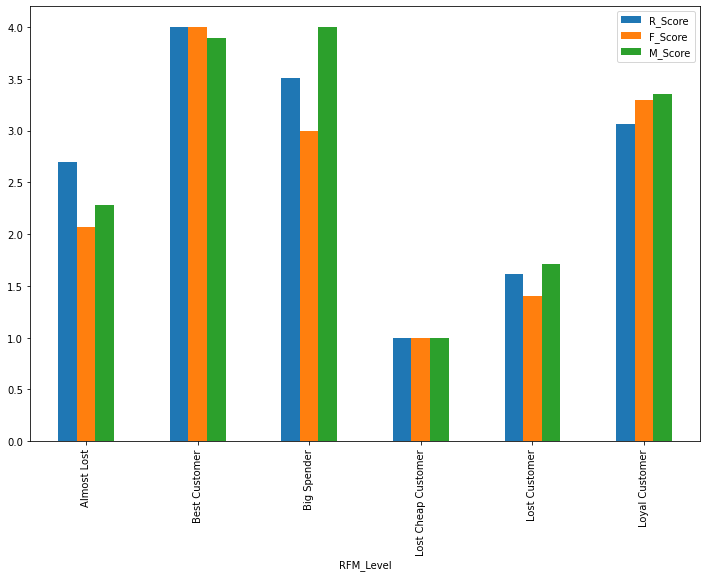

In [117]:
RFM_table.groupby('RFM_Level')[['R_Score', 'F_Score', 'M_Score']].mean().plot.bar(figsize=(12, 8))

2. How many customers do we have in each segment?

In [118]:
RFM_table.groupby('RFM_Level')['RFM_Level'].count().sort_values(ascending=False)

RFM_Level
Lost Customer          1034
Almost Lost            1011
Loyal Customer          842
Best Customer           475
Lost Cheap Customer     395
Big Spender             163
Name: RFM_Level, dtype: int64

In [119]:
#!pip install squarify

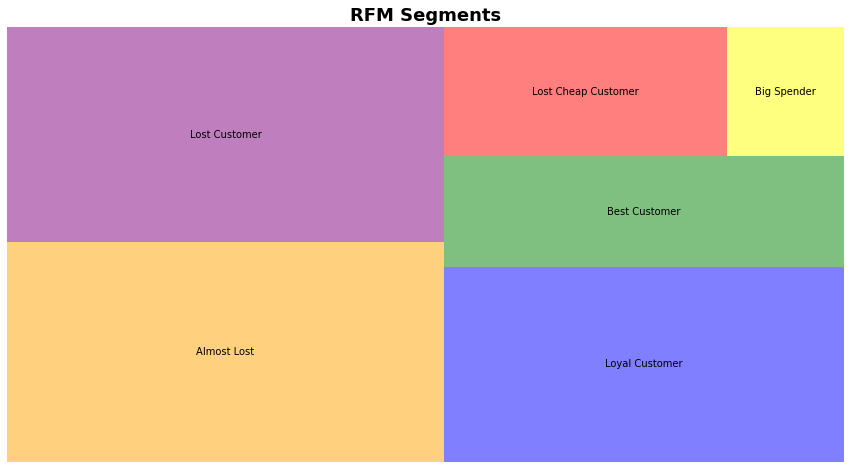

In [120]:
import squarify

squarity =RFM_table['RFM_Level'].value_counts()
color=['orange','purple', 'blue', 'green', 'red', 'yellow']


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(15,8)
squarify.plot(sizes= squarity, 
              label=['Almost Lost',
                     'Lost Customer',
                     'Loyal Customer',
                     'Best Customer',
                     'Lost Cheap Customer',
                     'Big Spender'] ,color = color, alpha=0.5,)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

Using customer segmentation categories found [here](http://www.blastam.com/blog/rfm-analysis-boosts-sales) we can formulate different marketing strategies and approaches for customer engagement for each type of customer.

Note: The author in the article scores 1 as the highest and 4 as the lowest

<a href = "#Tasks">Back to top</a>

# 4. Applying K-Means Clustering

Now that we have our customers segmented into 6 different categories, we can gain further insight into customer behavior by using predictive models in conjuction with our RFM model.
Possible algorithms include **Logistic Regression**, **K-means Clustering**, and **K-nearest Neighbor**. We will go with [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) since we already have our distinct groups determined. K-means has also been widely used for market segmentation and has the advantage of being simple to implement.

## Data Pre-Processing and Exploring

In [121]:
RFM_table.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Total,RFM_Level
CustomerID,,,,,,,,,
17850.0,372,34,5391.21,1,4,4,1-4-4,9,Loyal Customer
13047.0,31,10,3237.54,3,4,4,3-4-4,11,Loyal Customer
13748.0,95,5,948.25,2,3,3,2-3-3,8,Almost Lost
15100.0,333,3,876.00,1,3,3,1-3-3,7,Lost Customer
15291.0,25,15,4668.30,3,4,4,3-4-4,11,Loyal Customer


In [122]:
RFM_table.drop('RFM_Score', axis=1, inplace=True)

In [123]:
RFM_table.shape

(3920, 8)

In [124]:
RFM_table.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3920 entries, 17850.0 to 14569.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    3920 non-null   int64  
 1   Frequency  3920 non-null   int64  
 2   Monetary   3920 non-null   float64
 3   R_Score    3920 non-null   int64  
 4   F_Score    3920 non-null   int64  
 5   M_Score    3920 non-null   int64  
 6   RFM_Total  3920 non-null   int64  
 7   RFM_Level  3920 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 435.6+ KB


In [125]:
RFM_table.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,3920.0,91.742092,99.533485,0.00,17.000,50.000,142.000,373.0
Frequency,3920.0,4.246429,7.199202,1.00,1.000,2.000,5.000,209.0
Monetary,3920.0,1858.424654,7478.631256,3.75,298.185,644.975,1571.285,259657.3
R_Score,3920.0,2.509184,1.123148,1.00,2.000,3.000,4.000,4.0
F_Score,3920.0,2.322704,1.145097,1.00,1.000,2.000,3.000,4.0
M_Score,3920.0,2.500000,1.118177,1.00,1.750,2.500,3.250,4.0
RFM_Total,3920.0,7.331888,2.888027,3.00,5.000,7.000,10.000,12.0


### i. Define and Plot Feature Correlations

Create Heatmap and evaluate the results 

<AxesSubplot:>

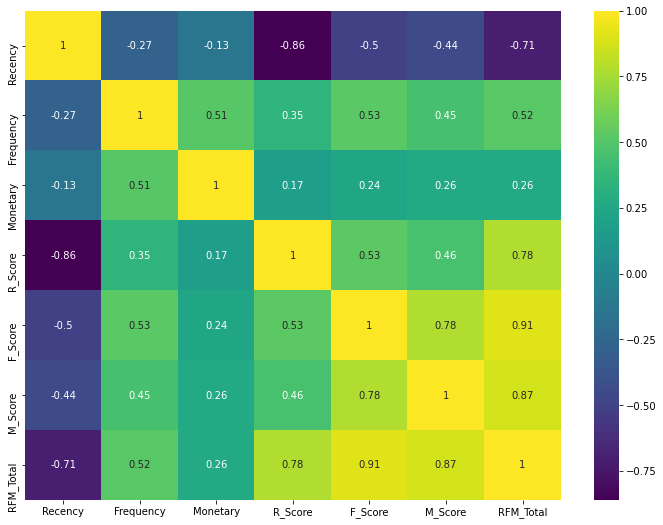

In [126]:
plt.figure(figsize=(12, 9))
sns.heatmap(RFM_table.corr(), annot=True, cmap='viridis')

### ii. Visualize Feature Distributions

To get a better understanding of the dataset, you can costruct a scatter matrix of each of the three features in the RFM data.

<Figure size 2160x1440 with 0 Axes>

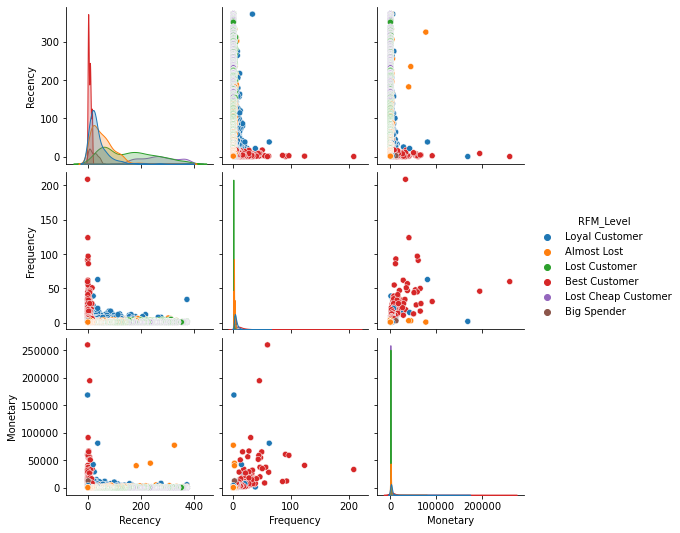

In [127]:
plt.figure(figsize=(30, 20))
sns.pairplot(RFM_table[['Recency', 'Frequency', 'Monetary', 'RFM_Level']], hue='RFM_Level')

<AxesSubplot:xlabel='Recency', ylabel='Frequency'>

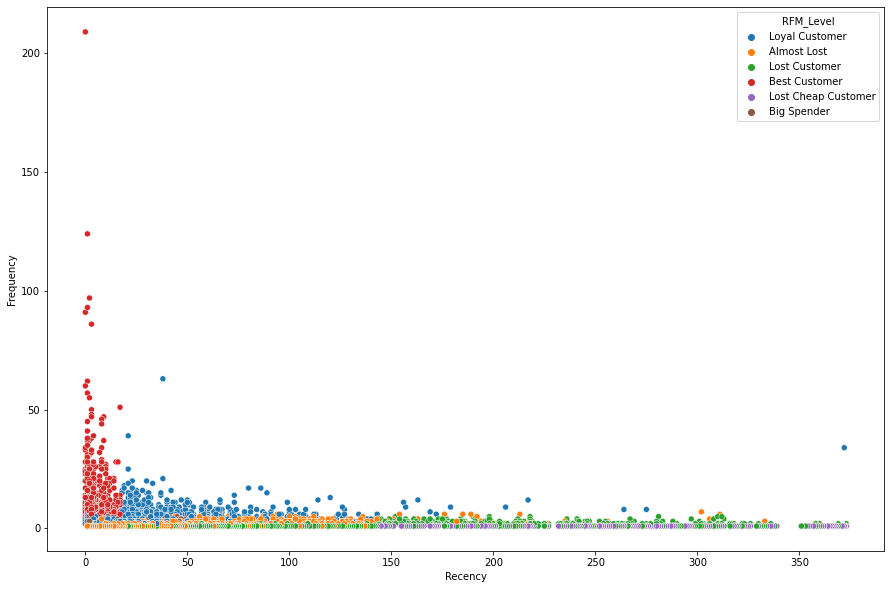

In [128]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=RFM_table, x='Recency', y='Frequency', hue='RFM_Level')

<AxesSubplot:xlabel='Recency', ylabel='Monetary'>

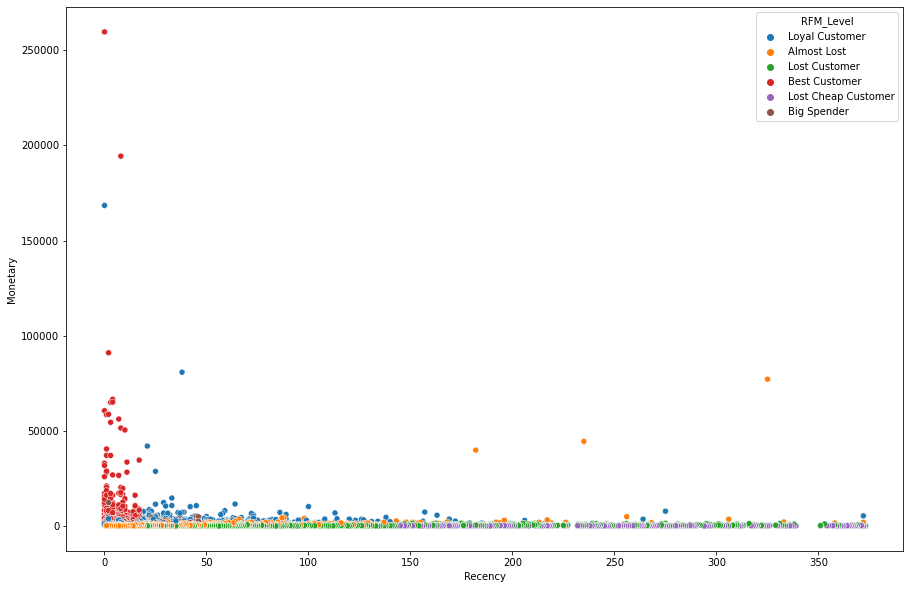

In [129]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=RFM_table, x='Recency', y='Monetary', hue='RFM_Level')

<AxesSubplot:xlabel='Frequency', ylabel='Monetary'>

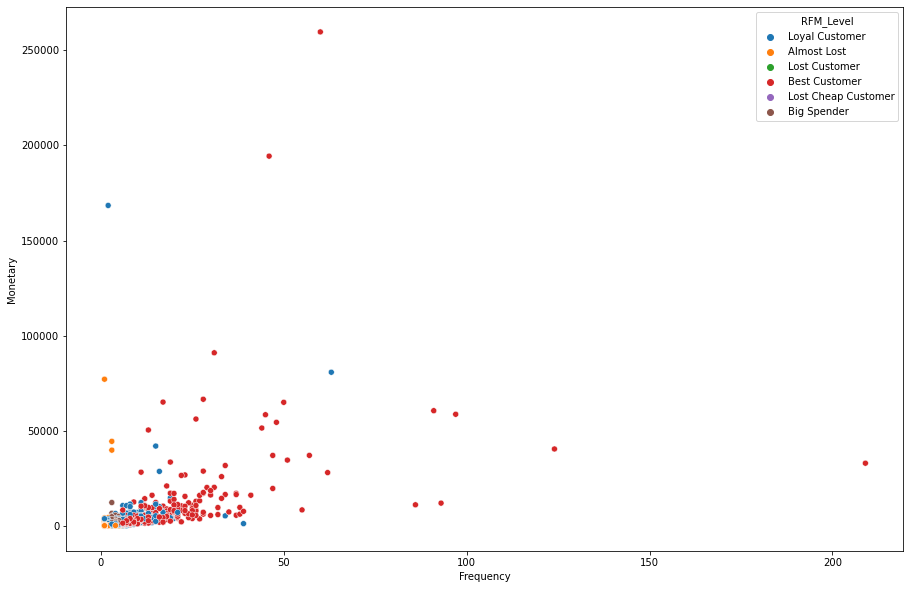

In [130]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=RFM_table, x='Frequency', y='Monetary', hue='RFM_Level')

<AxesSubplot:xlabel='R_Score', ylabel='Monetary'>

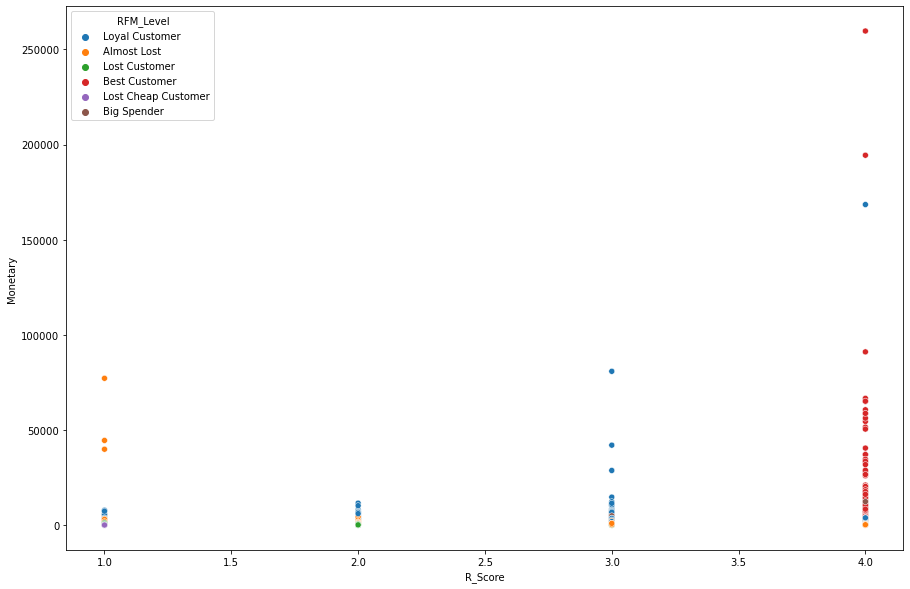

In [131]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=RFM_table, x='R_Score', y='Monetary', hue='RFM_Level')

### iii. Data Normalization

1. You can use the logarithm method to normalize the values in a column.

In [132]:
RFM_table.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Total,RFM_Level
CustomerID,,,,,,,,
17850.0,372,34,5391.21,1,4,4,9,Loyal Customer
13047.0,31,10,3237.54,3,4,4,11,Loyal Customer
13748.0,95,5,948.25,2,3,3,8,Almost Lost
15100.0,333,3,876.00,1,3,3,7,Lost Customer
15291.0,25,15,4668.30,3,4,4,11,Loyal Customer


In [133]:
RFM_table_N = RFM_table.drop('RFM_Level', axis=1)

In [134]:
RFM_table_N.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Total
CustomerID,,,,,,,
17850.0,372,34,5391.21,1,4,4,9
13047.0,31,10,3237.54,3,4,4,11
13748.0,95,5,948.25,2,3,3,8
15100.0,333,3,876.00,1,3,3,7
15291.0,25,15,4668.30,3,4,4,11


In [135]:
RFM_table_N = RFM_table_N[['Recency', 'Frequency', 'Monetary']].apply(np.log1p, axis=1).round(2)

In [136]:
RFM_table_N.head()

,Recency,Frequency,Monetary
CustomerID,,,
17850.0,5.92,3.56,8.59
13047.0,3.47,2.40,8.08
13748.0,4.56,1.79,6.86
15100.0,5.81,1.39,6.78
15291.0,3.26,2.77,8.45


2. Plot normalized data with scatter matrix or pairplot. Also evaluate results.

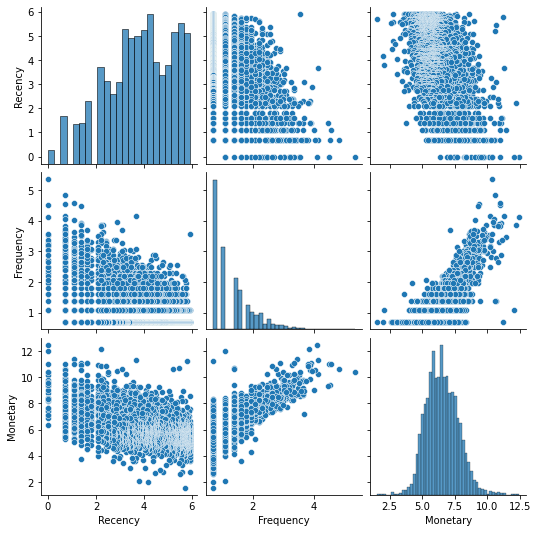

In [137]:
sns.pairplot(RFM_table_N)

## K-Means Implementation

For k-means, you have to set k to the number of clusters you want, but figuring out how many clusters is not obvious from the beginning. We will try different cluster numbers and check their [silhouette coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html). The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). 
<br>
<br>
**Note**: K-means is sensitive to initializations because they are critical to qualifty of optima found. Thus, we will use smart initialization called "Elbow Method".

### i. Define the Optimal Number of Clusters

[The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering) 

In [138]:
from sklearn.cluster import KMeans

In [139]:
from yellowbrick.cluster import KElbowVisualizer

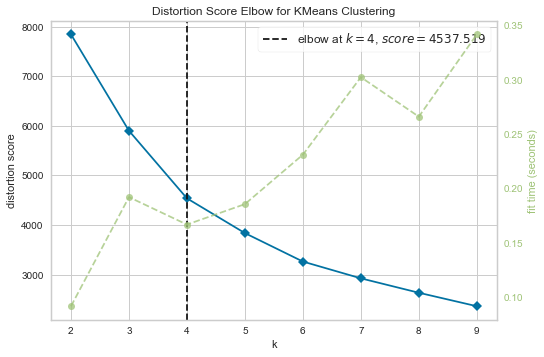

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [140]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(RFM_table_N)
visu.poof()

[Silhouette Coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [141]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [142]:
kmeans = KMeans(n_clusters=4).fit(RFM_table_N)
labels = kmeans.labels_

In [143]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(RFM_table_N)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(RFM_table_N, model.labels_)}')

Silhouette Score for 2 clusters: 0.4195320724666079
Silhouette Score for 3 clusters: 0.33534181797775026
Silhouette Score for 4 clusters: 0.3525204521865419
Silhouette Score for 5 clusters: 0.3380241532373555
Silhouette Score for 6 clusters: 0.3270760010540879
Silhouette Score for 7 clusters: 0.3173713559001106
Silhouette Score for 8 clusters: 0.3185141875432802
Silhouette Score for 9 clusters: 0.3125227173133915


### ii. Model Fitting

Fit the K-Means Algorithm with the optimal number of clusters you decided and save the model to disk.

In [144]:
k_means = KMeans(n_clusters=4).fit(RFM_table_N)

In [145]:
cust_segments = k_means.labels_

In [146]:
cust_segments

array([2, 2, 2, ..., 3, 3, 3])

In [147]:
centroids = k_means.cluster_centers_

In [148]:
centroids

array([[5.15327341, 0.84098127, 5.55373034],
       [1.83571642, 2.3561791 , 8.16332836],
       [3.99516401, 1.59056232, 7.28282099],
       [2.96965802, 1.03536557, 5.87849057]])

### iii. Visualize the Clusters

1. Create a scatter plot and select cluster centers

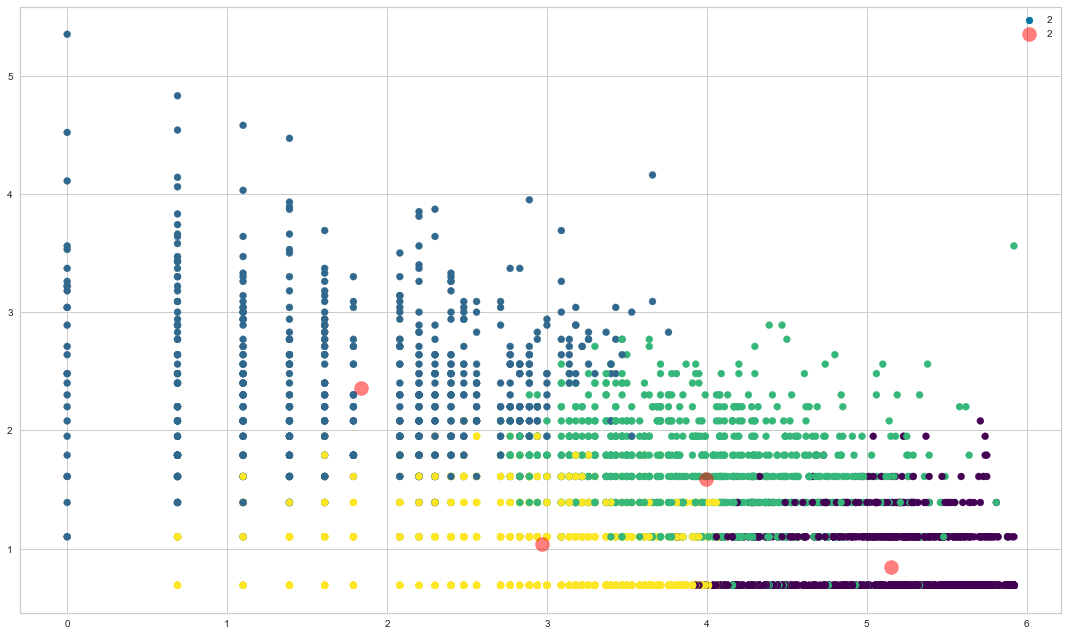

In [149]:
plt.figure(figsize=(15, 9))
plt.scatter(RFM_table_N.iloc[:, 0], RFM_table_N.iloc[:, 1], c=cust_segments, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], c = "red", s = 200, alpha=0.5)
plt.legend(cust_segments)
plt.tight_layout()

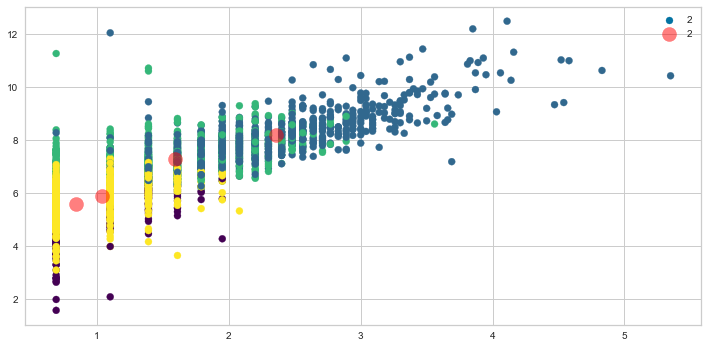

In [150]:
plt.figure(figsize=(10, 5))
plt.scatter(RFM_table_N.iloc[:, 1], RFM_table_N.iloc[:, 2], c=cust_segments, cmap='viridis')
plt.scatter(centroids[:,1], centroids[:,2], c = "red", s = 200, alpha=0.5)
plt.legend(cust_segments)
plt.tight_layout()

2. Visualize Cluster Id vs Recency, Cluster Id vs Frequency and Cluster Id vs Monetary using Box plot. Also evaluate the results. 

In [151]:
RFM_table['Clusters'] = labels

In [152]:
RFM_table_N['Clusters'] = labels

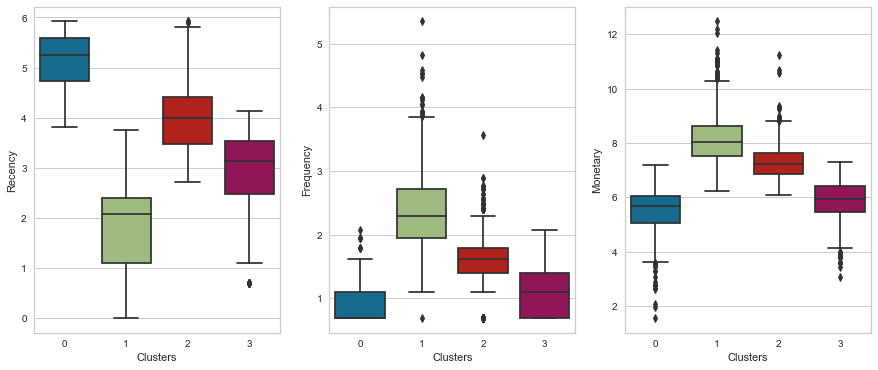

In [153]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.boxplot(RFM_table_N['Clusters'], RFM_table_N['Recency'])

plt.subplot(1,3,2)
sns.boxplot(RFM_table_N['Clusters'], RFM_table_N['Frequency'])

plt.subplot(1,3,3)
sns.boxplot(RFM_table_N['Clusters'], RFM_table_N['Monetary'])
plt.show()

### iv. Assign the Label

In [154]:
RFM_table.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Total,RFM_Level,Clusters
CustomerID,,,,,,,,,
17850.0,372,34,5391.21,1,4,4,9,Loyal Customer,2
13047.0,31,10,3237.54,3,4,4,11,Loyal Customer,2
13748.0,95,5,948.25,2,3,3,8,Almost Lost,2
15100.0,333,3,876.00,1,3,3,7,Lost Customer,0
15291.0,25,15,4668.30,3,4,4,11,Loyal Customer,1


In [155]:
RFM_table.groupby(['Clusters', 'RFM_Level' ])['Clusters'].count()

Clusters  RFM_Level          
0         Almost Lost            113
          Lost Cheap Customer    395
          Lost Customer          829
1         Best Customer          459
          Big Spender             70
          Loyal Customer         136
2         Almost Lost            392
          Best Customer           12
          Big Spender             93
          Lost Customer           41
          Loyal Customer         531
3         Almost Lost            506
          Best Customer            4
          Lost Customer          164
          Loyal Customer         175
Name: Clusters, dtype: int64

<AxesSubplot:xlabel='RFM_Level'>

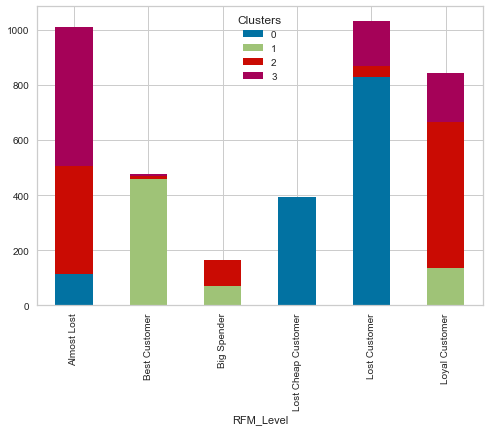

In [156]:
RFM_table.groupby(['RFM_Level', 'Clusters'])['Clusters'].count().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Clusters'>

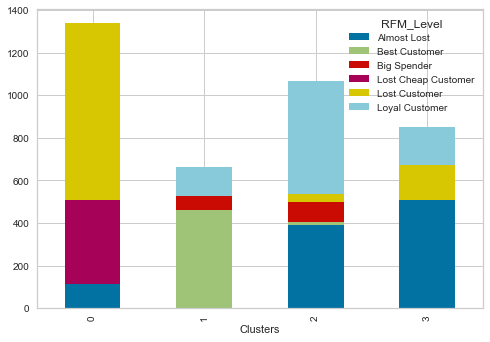

In [157]:
RFM_table.groupby(['Clusters', 'RFM_Level' ])['Clusters'].count().unstack().plot(kind='bar', stacked=True)

**Conclusion**

- Cluster 0 : The first cluster belongs to the "Best Customers" segment which we saw earlier as they purchase recently (R=4), frequent buyers (F=4), and spent the most (M=4)

- Cluster 1 : Second cluster can be interpreted as passer customers as their last purchase is long ago (R<=1),purchased very few (F>=2 & F < 4) and spent little (M>=4 & M < 4).Company has to come up with new strategies to make them permanent members. Low value customers
- Cluster 2 : The third cluster is more related to the "Almost Lost" segment as they Haven’t purchased for some time(R=1), but used to purchase frequently and spent a lot.

### v. Conclusion

Discuss your final results. Compare your own labels from the Customer Segmentation with the labels found by K-Means.

How we want to continue this analysis depends on how the business plans to use the results and the level of granularity the business stakeholders want to see in the clusters. We can also ask what range of customer behavior from high to low value customers are the stakeholders interested in exploring. From those answers, various methods of clustering can be used and applied on RFM variable or directly on the transaction data set.

**Annotation:**

Limitations of K-means clustering:

1. There is no assurance that it will lead to the global best solution.
2. Can't deal with different shapes(not circular) and consider one point's probability of belonging to more than one cluster.

These disadvantages of K-means show that for many datasets (especially low-dimensional datasets), it may not perform as well as you might hope.

<a href = "#Tasks">Back to top</a>

# 5. Create Cohort & Conduct Cohort Analysis
[Cohort Analysis](https://medium.com/swlh/cohort-analysis-using-python-and-pandas-d2a60f4d0a4d) is specifically useful in analyzing user growth patterns for products. In terms of a product, a cohort can be a group of people with the same sign-up date, the same usage starts month/date, or the same traffic source.
Cohort analysis is an analytics method by which these groups can be tracked over time for finding key insights. This analysis can further be used to do customer segmentation and track metrics like retention, churn, and lifetime value.

For e-commerce organizations, cohort analysis is a unique opportunity to find out which clients are the most valuable to their business. by performing Cohort analysis you can get the following answers to the following questions:

- How much effective was a marketing campaign held in a particular time period?
- Did the strategy employ to improve the conversion rates of Customers worked?
- Should I focus more on retention rather than acquiring new customers?
- Are my customer nurturing strategies effective?
- Which marketing channels bring me the best results?
- Is there a seasonality pattern in Customer behavior?
- Along with various performance measures/metrics for your organization.

Since we will be performing Cohort Analysis based on transaction records of customers, the columns we will be dealing with mainly:
- Invoice Data
- CustomerID
- Price
- Quantity

The following steps will performed to generate the Cohort Chart of Retention Rate:
- Month Extraction from InvioceDate column
- Assigning Cohort to Each Transaction
- Assigning Cohort Index to each transaction
- Calculating number of unique customers in each Group of (ChortDate,Index)
- Creating Cohort Table for Retention Rate
- Creating the Cohort Chart using the Cohort Table

The Detailed information about each step is given below:

## Future Engineering

### i. Extract the Month of the Purchase
First we will create a function, which takes any date and returns the formatted date with day value as 1st of the same month and Year.

In [158]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PaymentDue,Date,Recency,Frequency,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,372,34,5391.21
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,372,34,5391.21
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,372,34,5391.21
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,372,34,5391.21
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,372,34,5391.21


In [159]:
def get_month(date):
    '''to parse date into first day of a month, year
    date: any date format'''
    
    return dt.datetime(date.year,date.month,1) 

Now we will use the function created above to convert all the invoice dates into respective month date format.

In [160]:
# Create InvoiceMonth column
df_uk['InvoiceMonth'] = df_uk['InvoiceDate'].apply(get_month) 

# Group by CustomerID and select the InvoiceMonth value
# grouping = df_uk.groupby('CustomerID')['InvoiceMonth'] 

# Assign a minimum InvoiceMonth value to the dataset
df_uk['CohortMonth'] = df_uk.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [161]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PaymentDue,Date,Recency,Frequency,Monetary,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,372,34,5391.21,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,372,34,5391.21,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,372,34,5391.21,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,372,34,5391.21,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,372,34,5391.21,2010-12-01,2010-12-01


In [162]:
df_uk[df_uk['CustomerID'] == 12830][['InvoiceNo','InvoiceMonth', 'CohortMonth']].groupby('InvoiceNo').head().drop_duplicates()

,InvoiceNo,InvoiceMonth,CohortMonth
234640,557571,2011-06-01,2011-06-01
252242,559096,2011-07-01,2011-06-01
282924,561671,2011-07-01,2011-06-01
282934,561672,2011-07-01,2011-06-01
333652,566207,2011-09-01,2011-06-01
433904,574012,2011-11-01,2011-06-01


### ii. Calculating time offset in Months i.e. Cohort Index:
Calculating time offset for each transaction will allows us to report the metrics for each cohort in a comparable fashion.
First, you will create 4 variables that capture the integer value of years, months for Invoice and Cohort Date using the get_date_int() function which you'll create it below.

In [163]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month
    

You will use this function to extract the integer values for Invoice as well as Cohort Date in 3 seperate series for each of the two columns

In [164]:
invoice_year, invoice_month = get_date_int(df_uk, 'InvoiceMonth')

cohort_year, cohort_month = get_date_int(df_uk, 'CohortMonth')

years_diff = invoice_year - cohort_year

months_diff = invoice_month - cohort_month

Use the variables created above to calcualte the difference in days and store them in cohort Index column.

In [165]:
df_uk['CohortIndex'] = years_diff * 12 + months_diff + 1
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PaymentDue,Date,Recency,Frequency,Monetary,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,372,34,5391.21,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,372,34,5391.21,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,372,34,5391.21,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,372,34,5391.21,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,372,34,5391.21,2010-12-01,2010-12-01,1


In [166]:
df_uk['CohortIndex'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64)

In [167]:
df_uk['CohortIndex'].value_counts()

1     103674
2      25045
4      24207
3      24095
6      23188
5      23001
7      20761
8      20640
9      20556
12     20464
10     19887
11     17332
13      6353
Name: CohortIndex, dtype: int64

## Create 1st Cohort: User number & Retention Rate

### i. Pivot Cohort and Cohort Retention

In [168]:
grouping = df_uk.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

### ii. Visualize analysis of cohort 1 using seaborn and matplotlib modules

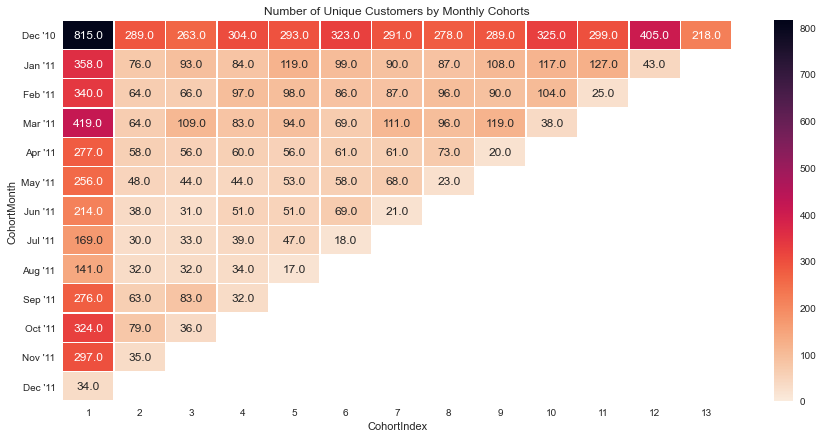

In [169]:
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]


plt.figure(figsize=(15,7))


plt.title('Number of Unique Customers by Monthly Cohorts')

sns.heatmap(data=cohort_counts,
            annot = True,
            cmap = "rocket_r",
            vmin = 0.0,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)

plt.show();

## Create the 2nd Cohort: Average Quantity Sold

### i. Pivot Cohort and Cohort Retention

In [170]:
cohort_sizes = cohort_counts.iloc[:,0]

retention = cohort_counts.divide(cohort_sizes, axis=0)*100

### ii. Visualize analysis of cohort 2 using seaborn and matplotlib modules

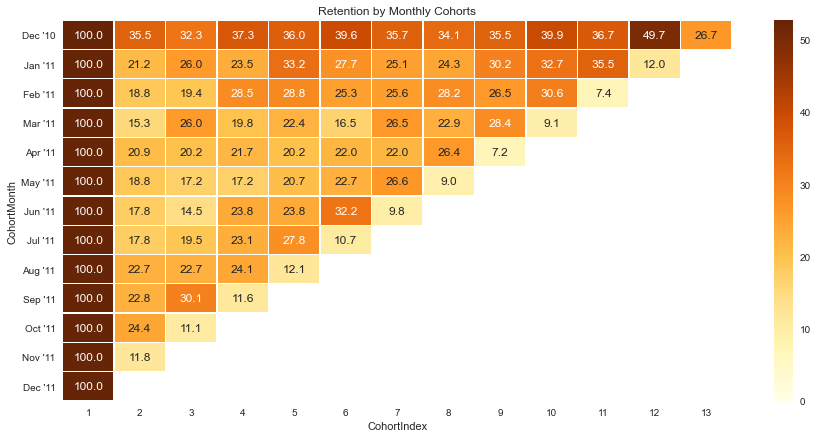

In [171]:
plt.figure(figsize=(15,7))


plt.title('Retention by Monthly Cohorts')

sns.heatmap(data=retention,
            annot = True,
            cmap = "YlOrBr",
            vmin = 0.0,
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)

plt.show()

## Create the 3rd Cohort: Average Sales


### i. Pivot Cohort and Cohort Retention

In [172]:
# Calculate the average of the Quantity column
cohort_data = grouping['Quantity'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')

### ii. Visualize analysis of cohort 3 using seaborn and matplotlib modules

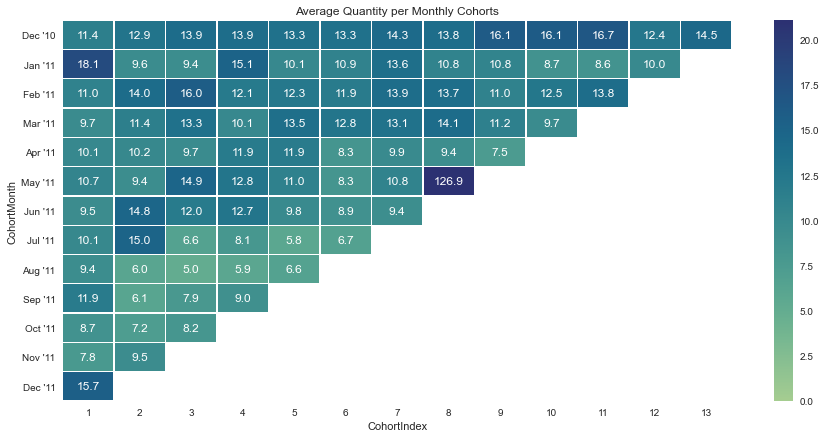

In [173]:
plt.figure(figsize=(15, 7))

plt.title('Average Quantity per Monthly Cohorts')

sns.heatmap(data = average_quantity,
            annot=True,
            vmin = 0.0,
            cmap='crest',
            vmax = list(average_quantity.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)
plt.show();

For e-commerce organisations, cohort analysis is a unique opportunity to find out which clients are the most valuable to their business. by performing Cohort analysis you can get answers to following questions:

- How much effective was a marketing campaign held in a particular time period?
- Did the strategy employed to improve the conversion rates of Customers worked?
- Should I focus more on retention rather than acquiring new customers?
- Are my customer nurturing strategies effective?
- Which marketing channels bring me the best results?
- Is there a seasoanlity pattern in Customer behahiour?